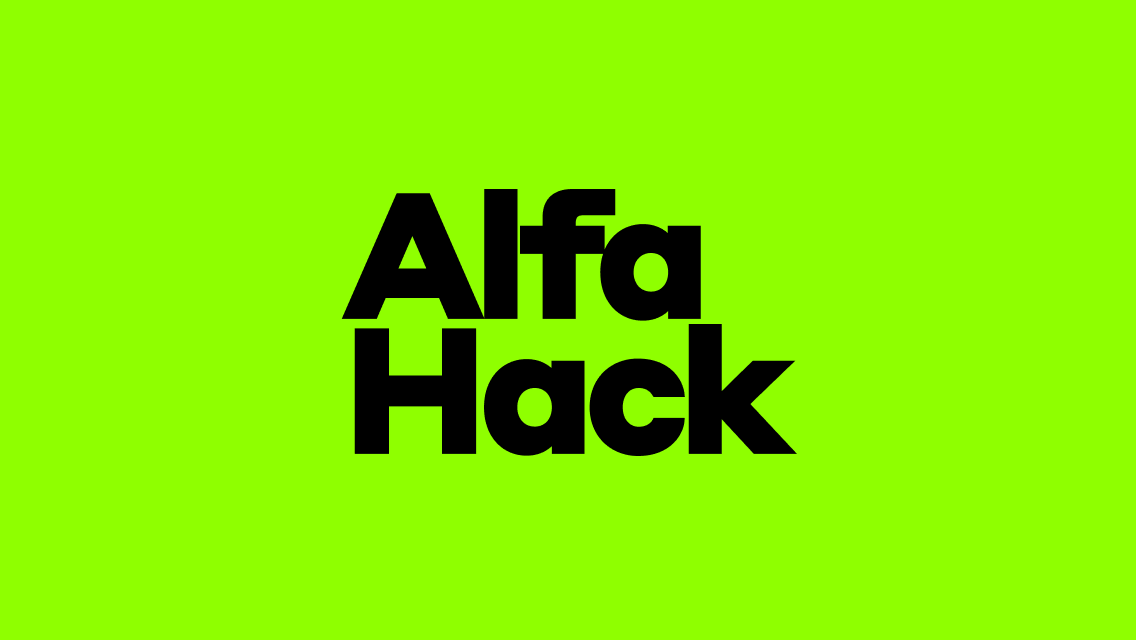

## Этап 1. Установка библиотек и импорт данных

In [1]:
# Cкачиваем необходимые библиотеки для работы
!pip install pandas numpy scikit-learn

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
import pandas as pd
import glob
import os

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 2"_, то необходимо поменять путь к директории и ссылки ниже

In [ ]:
# Путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 2/train'
# Путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 2/test'

Получим список файлов в каждой из папок с данными

In [ ]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x), key=lambda x: len(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_1.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_8.csv', 'train_7.csv', 'train_9.csv', 'train_10.csv']
Список файлов в репозитории test: ['test_1.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv', 'test_10.csv']


Объединим тренировочные данные в единый датасет train

In [ ]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Инициализируем PCA для сжатия данных
pca = PCA(n_components=50, random_state=42)
# Считываем первый датасет для обучения
learn = pd.read_csv(filenames_train[0])
# Обучаем PCA на первом датасете без искомых признаков
pca.fit(learn.drop(['target', 'smpl', 'id'], axis=1))
# Создаем список с названием новых фичей
new_columns = [f'feature_{i}' for i in range(1, 51)]


def compression(filename, features=['target', 'smpl', 'id']):
  # Переводим переменные в глобальную область видимости
  global data, base_info, transformed_data, result
  # Считываем файл данных
  data = pd.read_csv(filename)
  # Отделяем базовые данные
  base_info = data[features]
  # Трансформируем данные
  transformed_data = pd.DataFrame(pca.transform(data.drop(features, axis=1)))
  # Объединяем изначальную часть и преобразованные данные
  result = pd.concat([base_info, transformed_data], ignore_index=True, axis=1)
  # Обновляем названия признаков
  result.columns = [*features, *new_columns]
  # Возвращаем результат обработки
  return result


# Создадим список для записи считанных и обработанных файлов train
data_files_train = []


# Считаем и обработаем все файлы train, после чего добавим их в список
for filename in filenames_train:
  # Добавляем в список очищенный датасет
  data_files_train.append(compression(filename))

In [ ]:
# Объединим тренировочные данные в единый датасет
train_data = pd.concat(data_files_train, ignore_index=True)

# Удалим ненужные переменные для очистки памяти
del learn, data_files_train, filenames_train, path_train, data, base_info, transformed_data, result

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбца'.format(*train_data.shape))

# Выведем первые 5 строк тренировочных данных
display(train_data.head())

# Удостоверимся, что перед нами данные только из выборки train
display(train_data['smpl'].value_counts())

'Размерность полных тренировочных данных составляет: 4490468 строк и 53 столбца'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50
0,0,train,0,42.006207,15.517296,4.940232,6.346055,-1.979465,-6.538235,3.497902,...,2.153293,-0.228492,3.302406,0.738602,0.301656,-0.647815,0.754459,-0.423929,-1.122210,-0.713939
1,0,train,1,-13.597457,-6.453639,16.722364,-0.068598,-10.888593,-7.402630,0.907075,...,-0.227665,1.795974,-1.804104,-1.475144,0.414387,-0.039877,0.600228,0.206931,-0.329866,-1.093605
2,0,train,2,-12.688281,5.592698,-14.859004,-13.243453,12.994913,-2.133919,-2.565602,...,-0.830143,0.248039,0.320685,-0.450094,0.922797,1.157756,-0.359084,-0.825518,-0.039303,0.301419
3,0,train,3,-11.779575,16.233626,2.801769,4.876879,-3.115868,7.036391,-3.151196,...,-1.234607,2.006156,0.610810,-0.961435,0.007613,2.095697,-0.831778,4.180371,-0.202930,-0.155550
4,0,train,4,-10.706816,5.628017,-14.332889,4.321079,5.964782,2.333612,-4.010841,...,-0.215403,3.334874,0.894409,-0.133009,0.542633,3.105172,0.080890,0.514259,0.270161,-0.388989


,count
smpl,
train,4490468


Объединим тестовые данные в единый датасет test

In [ ]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем и обработаем все файлы test, после чего добавим их в список
for filename in filenames_test:
  # Добавляем в список очищенный датасет
  data_files_test.append(compression(filename, features=['smpl', 'id']))

In [ ]:
# Объединим тестовые данные в единый датасет
test_data = pd.concat(data_files_test, ignore_index=True)

# Удалим ненужные переменные для очистки памяти
del data_files_test, filenames_test, path_test, data, base_info, transformed_data, result

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тестовых данных составляет: {} строка и {} столбец'.format(*test_data.shape))

# Выведем первые 5 строк тренировочных данных
display(test_data.head())

# Удостоверимся, что перед нами данные только из выборки test
display(test_data['smpl'].value_counts())

'Размерность полных тестовых данных составляет: 509532 строка и 52 столбец'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50
0,test,4490468,-12.695455,0.163472,-13.671015,7.906316,1.944711,-0.134665,7.693033,-0.910276,...,0.941344,0.854217,-0.752932,0.443534,-1.627943,0.164442,-0.612085,0.759945,1.003682,0.198614
1,test,4490469,35.362040,-14.147303,-1.172192,8.171919,6.679985,-0.310231,3.924845,0.729583,...,0.803117,0.861039,-0.823127,1.363323,-0.504579,-0.000145,0.236745,0.173128,0.513046,1.210881
2,test,4490470,-12.622832,2.764752,-7.166607,4.441077,2.202404,1.964773,-0.643473,3.571186,...,-0.821575,1.870501,-0.186045,-0.749731,0.570698,0.388183,-0.603007,-0.183735,1.043912,0.723840
3,test,4490471,-12.300239,-15.104861,-0.463951,-2.150375,-6.628475,-2.647851,-8.655878,4.651609,...,-1.111114,-1.757127,0.396935,-1.004381,1.915811,-0.238729,1.292116,-1.075549,1.227171,1.056335
4,test,4490472,-11.727949,10.671911,2.570685,-0.307028,-12.077687,2.664341,0.264402,3.136030,...,1.383844,1.251246,-0.345023,0.829760,1.632082,0.346262,0.860573,0.693407,-0.747928,1.239710


,count
smpl,
test,509532


## Этап 2. Работа с моделью

In [ ]:
# Выделим признаки для обучения и искомый признак в датасете train
X = train_data.drop(['target', 'smpl'], axis=1)
y = train_data['target']

# Разбиваем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, фиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# Обучаем модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получаем предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test)

# Переводим предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитываем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

Метрика roc-auc на валидационных данных имеет значение: 0.8050251024564423


In [ ]:
# Удалим ненужные переменные для очистки памяти
del X_train, X_test, y_train, y_test, gbdt_clf, y_pred

## Этап 3. Предсказание для тестовых данных


In [ ]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(test_data.drop('smpl', axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
test_data['target'] = y_test_pred

# Сохраняем итоговые данные об id и предсказаниях в формате csv
test_data[['id', 'target']].to_csv('baseline_submission_case2.csv', index=False)

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.

In [4]:
prediction = pd.read_csv('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 2/baseline_submission_case2.csv')
prediction.shape

(509532, 2)